In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [8]:
!mkdir beer-not-beer

mkdir: cannot create directory ‘beer-not-beer’: File exists


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from PIL import Image

zip_name = 'beer_not_beer_40k.npz'
path_img = 'beer-not-beer/'

# download dataset
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth).CreateFile({'id': "15iuC4k4OfJxJZ2zOfn7qheuCBwV0Yvtl"}).GetContentFile(zip_name)

# save pictures
# X, y = [np.load(zip_name)[x] for x in ("X", "y")]
# for i in range(X.shape[0]):
#   im = Image.fromarray(X[i].transpose(1, 2, 0))
#   im.save(f'{path_img}{i}.jpg')

In [0]:
#fnames = get_image_files(path_img)
fnames = [f'{path_img}{i}.jpg' for i in range(X.shape[0])]
labels = ['beer' if y[i] == 1 else 'not-beer' for i in range(y.shape[0])]

In [17]:
data = ImageDataBunch.from_lists(path_img, fnames, labels=labels, ds_tfms=get_transforms(), size=64)
data.classes

['beer', 'not-beer']

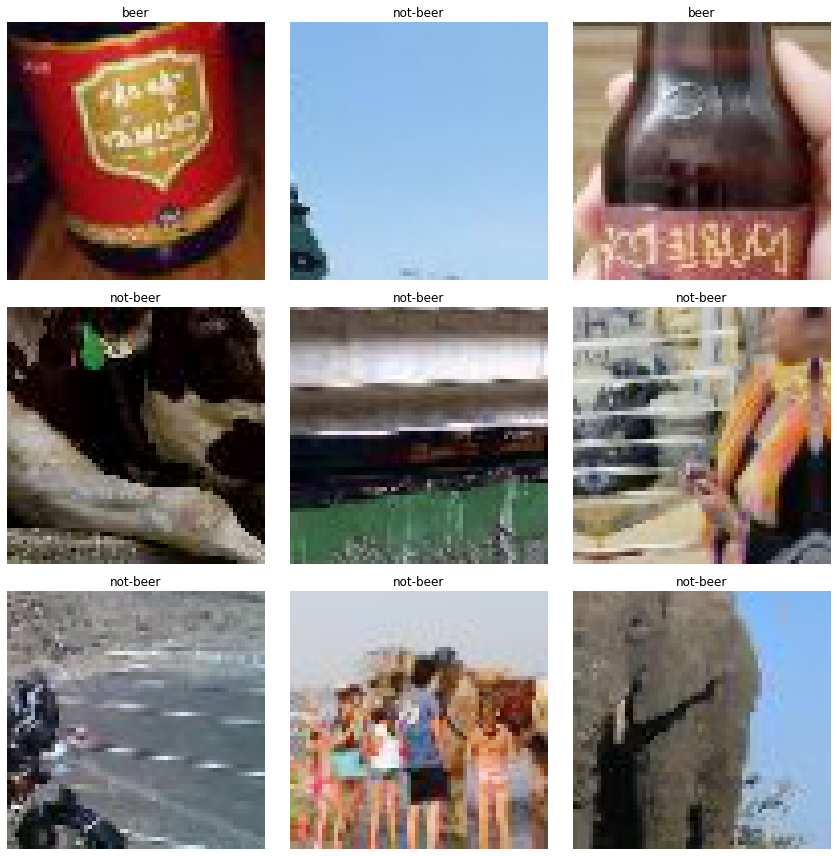

In [18]:
data.show_batch(3)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.175666,0.099216,0.038250,01:05
1,0.097943,0.053307,0.018250,01:05
2,0.067366,0.042961,0.015750,01:06
3,0.052759,0.035801,0.013625,01:05
4,0.049537,0.035828,0.013375,01:05


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


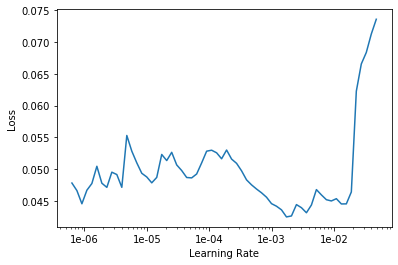

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(3e-6, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.050800,0.033889,0.012000,01:11
1,0.040548,0.034394,0.011375,01:11
2,0.032829,0.032882,0.010625,01:11
3,0.029813,0.036456,0.010875,01:13
4,0.026917,0.039940,0.011875,01:12
5,0.016970,0.032487,0.010125,01:11
6,0.011535,0.034657,0.009750,01:11
7,0.009706,0.035155,0.009750,01:11
8,0.009708,0.034662,0.009500,01:12
9,0.006482,0.033952,0.009250,01:13


In [0]:
learn.save('stage-1-50')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

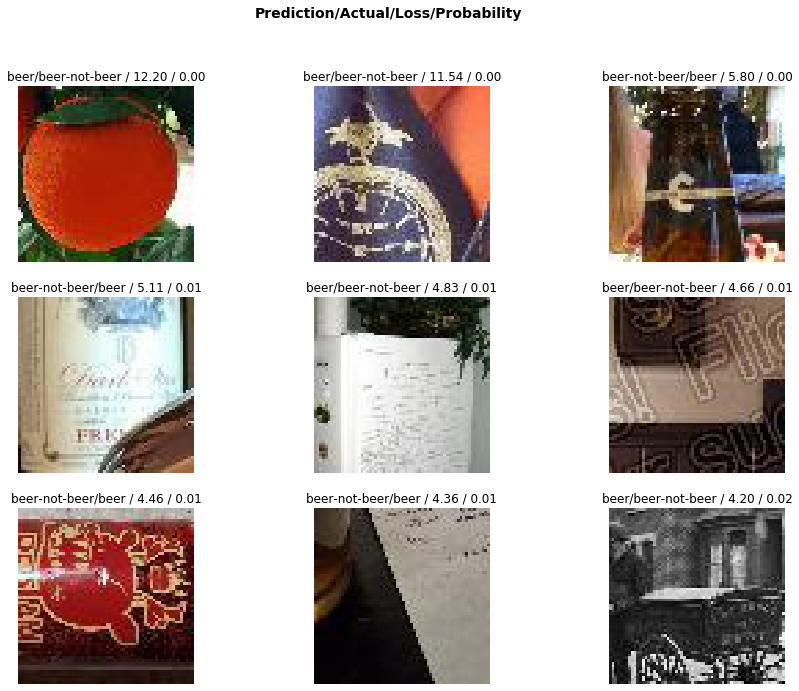

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

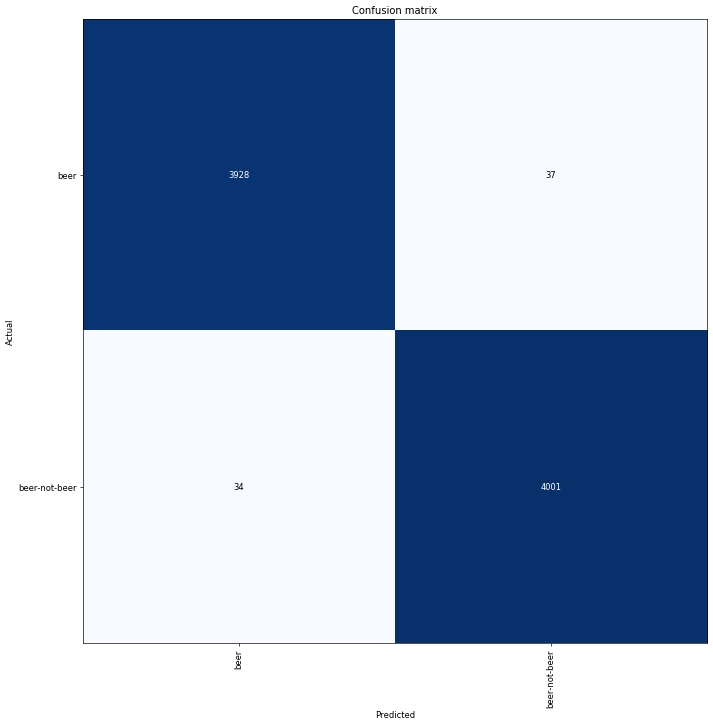

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)